In [ ]:
# HARJEET SINGH YADAV
# CSAI - 2020561
# ML Assignment 1, question 2, part 1

In [1]:
import numpy as np 
import pandas as pd
import random
import math
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# fetching the data tables form system
data = pd.read_csv("/content/drive/MyDrive/real_state.csv")
data.head(5)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.shape

(414, 8)

In [5]:
# Dropping the serial number column
data = data.drop(columns=['No'])

In [6]:
# Renaming the large columns name into small names 
data.rename(columns = {'X1 transaction date':'X1',
                       'X2 house age':'X2',
                       'X3 distance to the nearest MRT station':'X3',
                       'X4 number of convenience stores':'X4',
                       'X5 latitude':'X5',
                       'X6 longitude':'X6',
                       'Y house price of unit area':'Prize'},
                       inplace = True)


In [7]:
data.head(5)

,X1,X2,X3,X4,X5,X6,Prize
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
data.shape

(414, 7)

In [9]:
# Standardize the data 
data = ( data - data.mean())/ data.std();

In [10]:
data.head(5)

,X1,X2,X3,X4,X5,X6,Prize
0,-0.822688,1.254111,-0.791537,2.004982,1.124070,0.448220,-0.005894
1,-0.822688,0.156896,-0.615866,1.665488,0.911342,0.400654,0.310132
2,1.539289,-0.387322,-0.413515,0.307513,1.485063,0.687352,0.684953
3,1.244928,-0.387322,-0.413515,0.307513,1.485063,0.687352,1.236161
4,-1.120595,-1.115873,-0.549332,0.307513,0.833180,0.592220,0.376277


In [11]:
#splitting data in X and Y
X = data.drop('Prize',axis=1).values
Y = data['Prize']

In [12]:
X.shape        # All 6 features

(414, 6)

In [13]:
Y.shape       # Labels

(414,)

In [15]:
for x in X[:5]:
  #x = np.insert(x, 0 ,1)
  #x = np.reshape(x,(1,6))
  print(x, x.shape)

[-0.82268782  1.25411095 -0.79153734  2.00498156  1.12406983  0.44821991] (6,)
[-0.82268782  0.15689638 -0.61586648  1.66548775  0.91134153  0.40065418] (6,)
[ 1.5392887  -0.38732204 -0.41351495  0.30751251  1.4850633   0.68735175] (6,)
[ 1.24492826 -0.38732204 -0.41351495  0.30751251  1.4850633   0.68735175] (6,)
[-1.12059477 -1.11587252 -0.54933208  0.30751251  0.83318     0.59222028] (6,)


In [16]:
N = len(data)        # no of data samples
N

414

# **Gradient Decent**

In [17]:

def intial_weights(features):
  const_term = random.random()
  weights = np.random.rand(features)
  return const_term, weights


In [18]:
def predict_Y(const_term , weights, X):
  return const_term + np.dot(X,weights)
  

In [19]:
def calculate_cost(Y, Y_pred):
  residual_Y = Y - Y_pred 
  n = len(Y-residual_Y)
  return np.sum( np.dot(residual_Y.T,residual_Y))/n
  

In [20]:
def update_weights(x, y, y_pred, const_old, weights_old, learning_rate):

  d_const = (np.sum(y_pred-y)*2)/len(y)               # derivative term for const
  d_weights = (np.dot((y_pred-y),x)*2)/len(y)         # derivative term for weights
 
  weights_new = weights_old - learning_rate*d_weights   # updating new weights
  const_new = const_old - learning_rate*d_const      # updating const term

  return const_new, weights_new

In [25]:
def gradient_descent(X, Y, learning_rate, iterations):
  
  const, weights = intial_weights(X.shape[1])
  itr_cnt = 0
  graph_info = pd.DataFrame( columns = ['iterations', 'cost'])
  pdinf = 0

  for i in range(iterations):

    Y_pred = predict_Y(const, weights, X)
    this_cost = calculate_cost(Y, Y_pred)
    prev_const = const
    prev_weights = weights
    const, weights = update_weights(X, Y, Y_pred, prev_const, prev_weights, learning_rate)

    if( itr_cnt%10 == 0):
      graph_info.loc[pdinf] = [itr_cnt,this_cost]
    pdinf = pdinf+1
    itr_cnt += 1

  # print( "Final estimate of b and weights", const, weights)

  return graph_info, const, weights



In [26]:
rmse_pd, const , weights = gradient_descent(X, Y, 0.001, 300)

Text(0, 0.5, 'Cost')

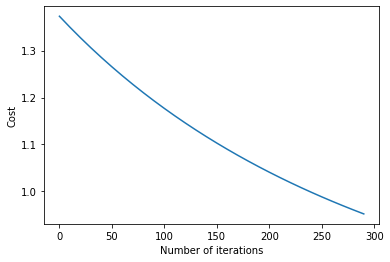

In [27]:
plt.plot(rmse_pd[ 'iterations'],np.sqrt(rmse_pd['cost']))
plt.xlabel("Number of iterations")
plt.ylabel("Cost")


# **K fold cross-validation**

In [40]:
K_values = [2, 3, 4 , 5]
RMSE = []
GRAPH = []

for K in K_values:
  chunk = int(N/K);
  error = []
  temp_graph = []
  for i in range(K):

    start = chunk*i
    end = chunk*(i+1)

    x_test  = X[ start:end ];
    y_test  = Y[ start:end ];
    
    x_train = np.array([ X[i] for i in range(N) if i not in range(start , end) ]);
    y_train = np.array([ Y[i] for i in range(N) if i not in range(start , end) ]);
    rmse_info, const, weights = gradient_descent(x_train, y_train, 0.001, 300)

    y_pred = predict_Y(const, weights, x_test)
    rmse = math.sqrt(calculate_cost(y_test, y_pred))
    error.append(rmse)
    temp_graph.append(rmse_info)
  GRAPH.append(temp_graph)
  RMSE.append( sum(error)/len(error))


Text(0, 0.5, 'RMSE')

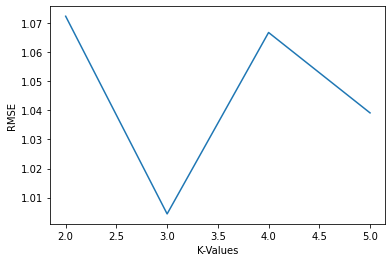

In [41]:
# Different K values vs RMSE
plt.plot(K_values, RMSE)
plt.xlabel("K-Values")
plt.ylabel("RMSE")

In [42]:
print("K_VALUES   RMSE")
for i in range(len(RMSE)):
  print(K_values[i], RMSE[i])


K_VALUES   RMSE
2 1.07232254606487
3 1.004409534105405
4 1.0667385599548809
5 1.0391202968575077


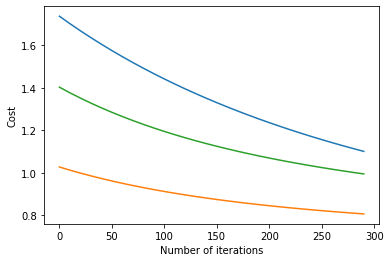

In [45]:
# RMSE vs Iterations for the best value of k
best_k = RMSE.index(min(RMSE)) + 2

for i in range(best_k):
  plt.plot(GRAPH[best_k-2][i][ 'iterations'], GRAPH[best_k-2][i]['cost']**(1/2))
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost")


In [ ]:
best_k

3

# **L2 REGULARIZATION / Ridge Regression**

In [46]:
def calculate_cost_L2(Y, Y_pred, W, lmd):
  residual_Y = Y - Y_pred 
  n = len(Y-residual_Y)
  return np.sum( np.dot(residual_Y.T,residual_Y))/n + np.dot(W, W.T)*lmd    # new cost funtion for L2 regularisation


In [47]:
def update_weights_L2(x, y, y_pred, const_old, weights_old, learning_rate, lmd):

  d_const = (np.sum(y_pred-y)*2)/len(y)               # derivative term for const
  d_weights = (np.dot((y_pred-y),x)*2)/len(y) + 2*lmd*weights_old     # derivative term for weights
 
  weights_new = weights_old - learning_rate*d_weights   # updating new weights
  const_new = const_old - learning_rate*d_const      # updating const term

  return const_new, weights_new

In [56]:
def gradient_descent_L2(X, Y, lmd, learning_rate, iterations):
  
  const, weights = intial_weights(X.shape[1])
  itr_cnt = 0
  graph_info = pd.DataFrame( columns = ['iterations', 'cost'])
  pdinf = 0
  for i in range(iterations):

    Y_pred = predict_Y(const, weights, X)
    this_cost = calculate_cost_L2(Y, Y_pred, weights, lmd)
    prev_const = const
    prev_weights = weights
    const, weights = update_weights_L2(X, Y, Y_pred, prev_const, prev_weights, learning_rate, lmd)

    if( itr_cnt%10 == 0):
      graph_info.loc[pdinf] = [itr_cnt,this_cost]
    pdinf = pdinf+1
    itr_cnt += 1

  # print( "Final estimate of b and weights", const, weights)

  return graph_info, const, weights



In [61]:
def L2_regularisation(lmd):  # lmd is l2 parameter
  chunk = N//best_k
  plt.figure()
  for i in range(best_k):

      start = chunk*i
      end = chunk*(i+1)

      x_test  = X[ start:end ];
      y_test  = Y[ start:end ];
      
      x_train = np.array([ X[i] for i in range(N) if i not in range(start , end) ]);
      y_train = np.array([ Y[i] for i in range(N) if i not in range(start , end) ]);
      rmse_info, const, weights = gradient_descent_L2(x_train, y_train, lmd, 0.001, 300)
      
      plt.plot(rmse_info[ 'iterations'],np.sqrt(rmse_info['cost']))
      plt.xlabel("Number of iterations")
      plt.ylabel("Cost")


FOR DIFFERENT L2 REGULARISATION PARAMETER :
FOR LAMDA =  0.001
FOR LAMDA =  0.01
FOR LAMDA =  0.1
FOR LAMDA =  1
FOR LAMDA =  2


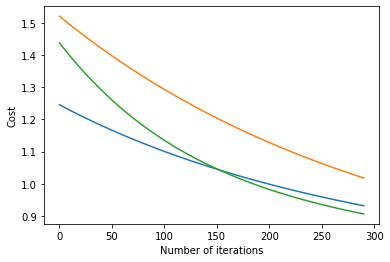

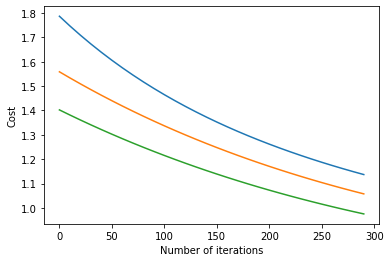

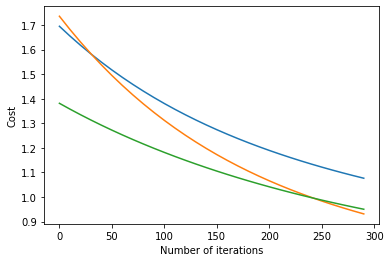

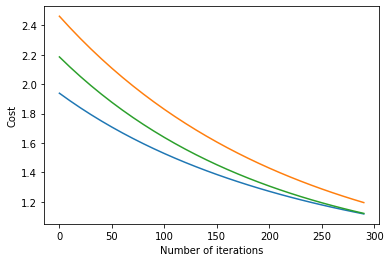

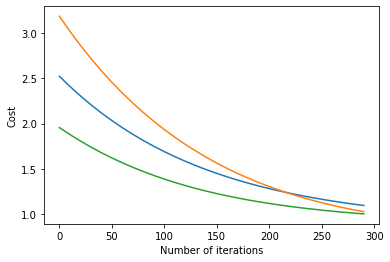

In [63]:
lamda = [ 0.001, 0.01, 0.1, 1, 2]
print("FOR DIFFERENT L2 REGULARISATION PARAMETER :")
for lmd in lamda:             
  print("FOR LAMDA = ", lmd)
  L2_regularisation(lmd)


# **L1 REGULARIZATION / LASSO**

In [64]:
def calculate_cost_L1(Y, Y_pred, W, lmd):
  residual_Y = Y - Y_pred 
  n = len(Y-residual_Y)
  return np.sum( np.dot(residual_Y.T,residual_Y))/n +  + lmd*abs(np.sum(W))   # new cost funtion for L2 regularisation


In [65]:
def update_weights_L1(x, y, y_pred, const_old, weights_old, learning_rate, lmd):

  d_const = (np.sum(y_pred-y)*2)/len(y)               # derivative term for const
  d_weights = (np.dot((y_pred-y),x)*2)/len(y) + lmd*(weights_old / np.absolute(weights_old))    # derivative term for weights
 
  weights_new = weights_old - learning_rate*d_weights   # updating new weights
  const_new = const_old - learning_rate*d_const      # updating const term

  return const_new, weights_new

In [66]:
def gradient_descent_L1(X, Y, lmd, learning_rate, iterations):
  
  const, weights = intial_weights(X.shape[1])
  itr_cnt = 0
  graph_info = pd.DataFrame( columns = ['iterations', 'cost'])
  pdinf = 0
  for i in range(iterations):

    Y_pred = predict_Y(const, weights, X)
    this_cost = calculate_cost_L1(Y, Y_pred, weights, lmd)
    prev_const = const
    prev_weights = weights
    const, weights = update_weights_L1(X, Y, Y_pred, prev_const, prev_weights, learning_rate, lmd)

    if( itr_cnt%10 == 0):
      graph_info.loc[pdinf] = [itr_cnt,this_cost]
    pdinf = pdinf+1
    itr_cnt += 1

  return graph_info, const, weights



In [70]:
def L1_regularisation(lmd):  # lmd is l1 parameter
  chunk = N//best_k
  plt.figure()
  for i in range(best_k):

      start = chunk*i
      end = chunk*(i+1)

      x_test  = X[ start:end ];
      y_test  = Y[ start:end ];
      
      x_train = np.array([ X[i] for i in range(N) if i not in range(start , end) ]);
      y_train = np.array([ Y[i] for i in range(N) if i not in range(start , end) ]);
      rmse_info, b, theta = gradient_descent_L1(x_train, y_train, lmd, 0.001, 300)

      plt.plot(rmse_info[ 'iterations'],np.sqrt(rmse_info['cost']))
      plt.xlabel("Number of iterations")
      plt.ylabel("Cost")


FOR DIFFERENT L1 REGULARISATION PARAMETER :
FOR LAMDA =  0.001
FOR LAMDA =  0.01
FOR LAMDA =  0.1
FOR LAMDA =  1
FOR LAMDA =  2


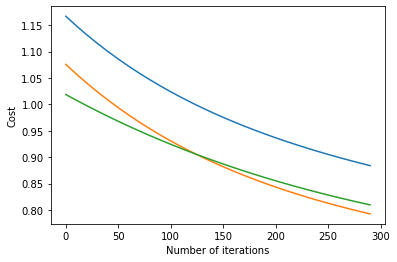

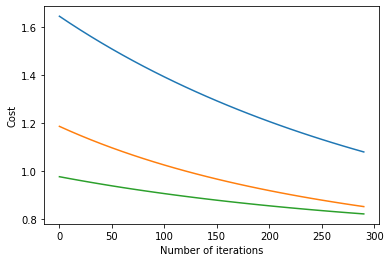

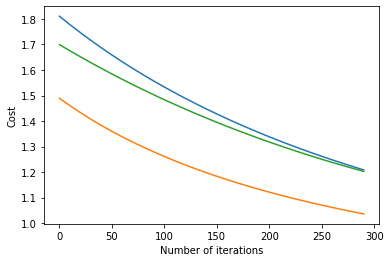

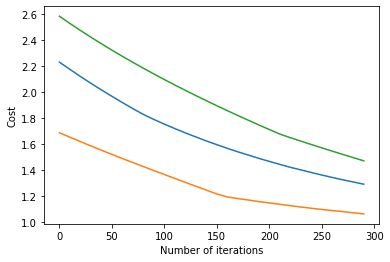

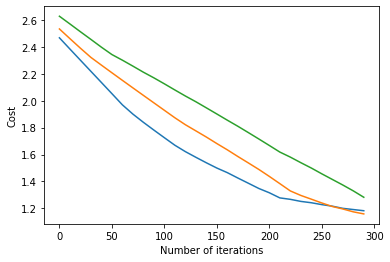

In [72]:
lamda = [ 0.001, 0.01, 0.1, 1, 2]

print("FOR DIFFERENT L1 REGULARISATION PARAMETER :")
for lmd in lamda:             
  print("FOR LAMDA = ", lmd)
  L1_regularisation(lmd)

# **NORMAL EQUATION**

In [73]:
def predict(X, weights):
    y_pred = np.dot(X, weights)
    return y_pred


Rmse on validation set  0.5983683841153545
Rmse on validation set  0.7332447079473199
Rmse on validation set  0.5754223830290294


Text(0, 0.5, 'Cost / RMSE')

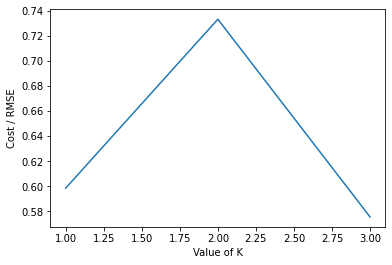

In [75]:
chunk = N//best_k
iterations = []
rmse = []
for i in range(best_k):

    start = chunk*i
    end = chunk*(i+1)

    x_test  = X[ start:end ];
    y_test  = Y[ start:end ];
    
    x_train = np.array([ X[i] for i in range(N) if i not in range(start , end) ]);
    y_train = np.array([ Y[i] for i in range(N) if i not in range(start , end) ]);

    x_test = np.append(x_test, np.ones(( x_test.shape[0],1)), axis=1)    
    weights = np.dot(np.linalg.inv(np.dot(x_test.T, x_test)), np.dot(x_test.T, y_test))           # Nomral Equation (X'X)-1(X'Y)
    y_pred = predict(x_test, weights)
    cost = math.sqrt(calculate_cost(y_test, y_pred))

    rmse.append(cost)
    iterations.append(i+1)
    print( "Rmse on validation set " , rmse[i])

plt.plot( iterations , rmse)
plt.xlabel("Value of K")
plt.ylabel("Cost / RMSE")

